<a href="https://colab.research.google.com/github/pratiktamgadge/Cognifyz-Technologies-Internship-Restaurant-Data-Analysis/blob/main/Restaurant_Data_Analysis_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Restaurant_Data_Analysis

##### **Project Type**    - EDA
##### **Industry**    - Cognifyz Technologies
##### **Contribution**    - Individual
##### **Member Name -** Pratik Tamgadge
##### **Level -** 1

# **Project Summary -**

 **Key Tasks in Level 1:**

 **Task-1: Top Cuisines**

1) Determine the top three most
common cuisines in the dataset.

2) Calculate the percentage of
restaurants that serve each of the top
cuisines.

 **Task-2: City Analysis**

1) Identify the city with the highest number
of restaurants in the dataset.

2) Calculate the average rating for
restaurants in each city.
Determine the city with the highest
average rating.

**Task-3: Price Range Distribution**

1) Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

2) Calculate the percentage of restaurants
in each price range category.

**Task-4: Online Delivery**

1) Determine the percentage of restaurants
that offer online delivery.

2) Compare the average ratings of restaurants
with and without online delivery.

# ***Let's Begin***

## ***Task 1: Top Cuisines***

### Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Dataset .csv")

In [6]:
# Dataset Rows & Columns count
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
# Dataset Column cuisines
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


### 1) Determine the top three most common cuisines in the dataset.

In [9]:
cuisine_count= df['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print(cuisine_count)
top_cuisine=cuisine_count.head(3)
print("The Top 3 Cuisines are : ",top_cuisine)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
The Top 3 Cuisines are :  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


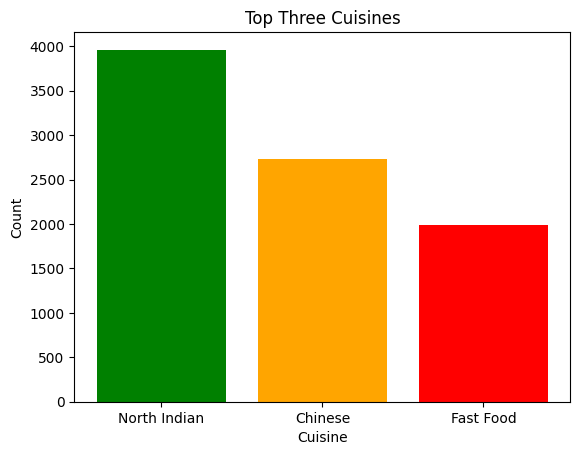

In [10]:
colours = ['green', 'orange', 'red']
plt.bar(top_cuisine.index, top_cuisine.values, color=colours)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Top Three Cuisines')
plt.show()

### 2) Calculate the percentage of restaurants that serve each of the top cuisines.

In [11]:
total_restaurant = len(df)
print(total_restaurant)
top_cuisine10=cuisine_count.head()
percentages = (top_cuisine10 / total_restaurant) * 100
print("The Market share of Top 5 Cuisines are : ",percentages)

9551
The Market share of Top 5 Cuisines are :  Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


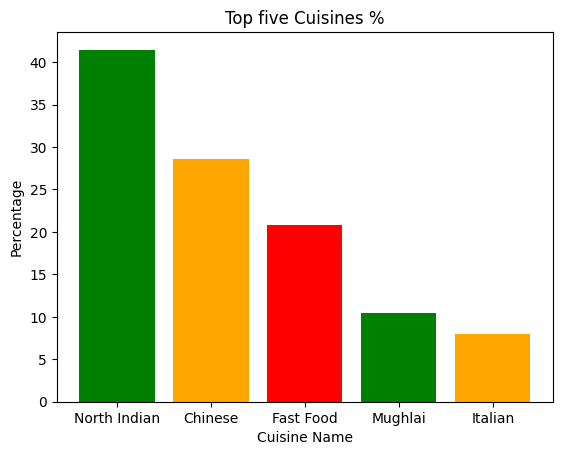

<Figure size 1200x600 with 0 Axes>

In [12]:
plt.bar(top_cuisine10.index, percentages.values, color=colours)
plt.xlabel('Cuisine Name')
plt.ylabel('Percentage')
plt.title('Top five Cuisines %')
plt.figure(figsize=(12,6))
plt.show()

## ***Task 2: City Analysis***

### 1) Identify the city with the highest number of restaurants in the dataset.

In [13]:
city_count = df['City'].value_counts()
restaurants_no = city_count.head(1)
print("City with the highest number of restaurants : ", city_count.idxmax())
print(restaurants_no)

City with the highest number of restaurants :  New Delhi
City
New Delhi    5473
Name: count, dtype: int64


### 2) Calculate the average rating for restaurants in each city. Determine the city with the highest average rating.

In [14]:
rating_by_each_city= df.groupby('City')['Aggregate rating'].mean()
print("The average Rating of each city : ",rating_by_each_city)

The average Rating of each city :  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [15]:
top_rated_city=rating_by_each_city.idxmax()
value=rating_by_each_city.max()
print("The city With Highest Avg. Rating is : ",top_rated_city,",","Rating =",value)

The city With Highest Avg. Rating is :  Inner City , Rating = 4.9


## ***Task 3: Price Range Distribution***

### 1) Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

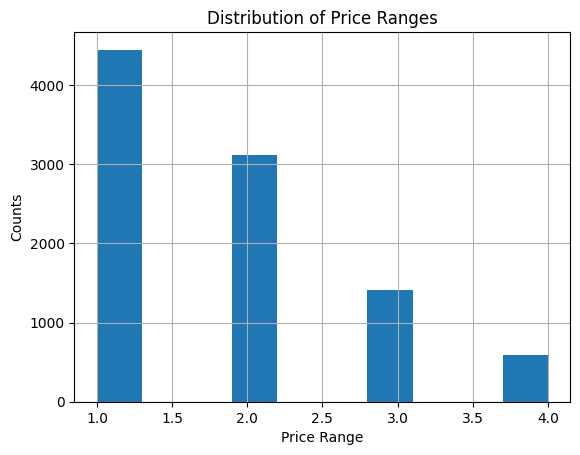

In [16]:
df.hist(column="Price range")
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Counts')
plt.show()

### 2) Calculate the percentage of restaurants in each price range category.

In [17]:
price_range_count=df["Price range"].value_counts()
total_restaurant = len(df)
percentage = round((price_range_count/total_restaurant)*100,2)
percentage_m= pd.merge(price_range_count, percentage,on="Price range")
print("The %  of Resturent in each Price Range Category are : ",percentage_m)

The %  of Resturent in each Price Range Category are :               count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


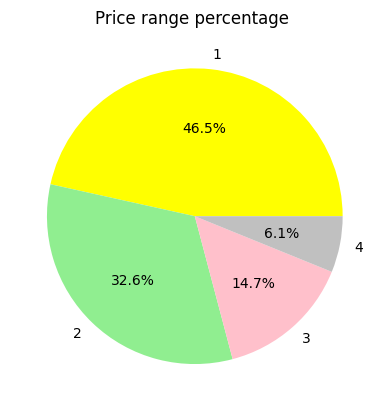

In [18]:
plt.pie(percentage,labels=percentage.index,autopct='%1.1f%%',colors=["yellow","lightgreen","pink","silver"])
plt.title("Price range percentage ")
plt.show()

## ***Task 4: Online Delivery***

### 1) Determine the percentage of restaurants that offer online delivery.

In [22]:
online_delivery= df['Has Online delivery'].value_counts().get('Yes', 0)
print("Total Restaurant with Online Delivery : ",online_delivery)

Total Restaurant with Online Delivery :  2451


In [23]:
no= df['Has Online delivery'].value_counts().get('No', 0)
print("Restaurant with NO Online Delivery : ",no)

Restaurant with NO Online Delivery :  7100


In [24]:
Row_count= len(df)
percentage_of_online_delivery= round((online_delivery/Row_count)*100,2)
print("ToTal % of Online Delivery :", percentage_of_online_delivery)

ToTal % of Online Delivery : 25.66


In [25]:
percentage_of_NO_online_delivery =round((no/Row_count)*100,2)
print("Total % where Online Delivery is not present : ",percentage_of_NO_online_delivery)

Total % where Online Delivery is not present :  74.34


### 2) Compare the average ratings of restaurants with and without online delivery.

In [26]:
Avg_rating_yes= round(df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean(),2)
print("Average Rating With online Delivery : ",Avg_rating_yes)

Average Rating With online Delivery :  3.25


In [27]:
Avg_rating_No= round(df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean(),2)
print("Average Rating Without online Delivery : ",Avg_rating_No)

Average Rating Without online Delivery :  2.47


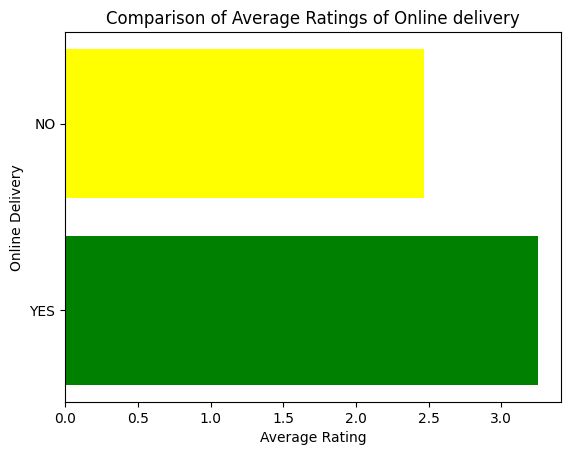

In [28]:
labels = ['YES', 'NO']
average_rating = [Avg_rating_yes, Avg_rating_No]
colors='green','yellow'
plt.barh(labels, average_rating, color=colors)
plt.ylabel('Online Delivery')
plt.xlabel('Average Rating')
plt.title('Comparison of Average Ratings of Online delivery')
plt.show()